In [1]:
from __future__ import division
import sys,os
import time
import argparse

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

import pandas as pd
from   glob import glob

sys.path.append('../BackendTools')
import ResonanceFitter as fitres
import ResonanceFitResult as fitclass
from VNAMeas import *

sys.path.append('../AnalysisScripts')
from plot_VNA_PowerScan import create_dirs,get_input_files,fit_single_file

In [2]:
## Set up matplotlib options for plots
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')
dfc = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
## Flag to display plots
show_plots = True
save_plots = False

## Series identifier
day    = '20230212' # '20230224' # 
time   = '105022' # '075318' # 
series = day + '_' + time

## Path to VNA data
dataPath = '/data/TempSweeps/VNA/'

## Create a place to store processed output
out_path = '/data/ProcessedOutputs/out_' + series

Storing output at /data/ProcessedOutputs/out_20220216_123052
Searching for files in: /data/PowerSweeps/VNA/20230212/20230212_105022/
 with prefix: Psweep_P
 and  suffix: _20230212_105022.h5
Using files:
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-50.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-49.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-48.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-47.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-46.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-45.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-44.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-43.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-42.0_20230212_105022.h5
- /data/PowerSweeps/VNA/20230212/20230212_105022/Psweep_P-4

Resonance #0
Fine Fit result for peak 0
f0 : 4.241985255714017 +/- 3.762946062577639e-09
Qr : 257409.96402194453 +/- 6.659953956266094e-10
phi : -0.07697057060580743 +/- 0.0003283439409476895
zOff : (0.25470284054566433+0.42623794126335657j) +/- (5.686310011335009e-06+5.624910964460646e-06j)
QcHat : 676029.6427321644 +/- 1.589576844461224e-08
tau : (44.47599854357636+0.29740335982836846j) +/- (0.004104756998919355+0.004190398724980806j)
Qc : 678037.156285839 +/- 1.589576930147164e-08
VNA Measurement: 20230212_105022
====---------------------------====
|             Date:   20230212
|   RF Power [dBm]:   -44.0
|   N averages:       20
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241233000.0
|   Sweep f max [Hz]: 4242733000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: -99.99
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -44.0 dBm
Resonance #0
Fine Fit result for peak 0
f0 :

Resonance #0
Fine Fit result for peak 0
f0 : 4.241985007988179 +/- 1.4968602094268249e-09
Qr : 261851.04162119076 +/- 2.6376589742011615e-10
phi : -0.07866839134785052 +/- 0.00013281469081220053
zOff : (0.25500486824301455+0.4278636174024725j) +/- (2.3308130448360923e-06+2.306485803233882e-06j)
QcHat : 675010.8323349346 +/- 6.5212325981585916e-09
tau : (44.48112621238689+0.2981445132666902j) +/- (0.001678448764609395+0.0017128449519870994j)
Qc : 677104.9570775576 +/- 6.521232655675023e-09
VNA Measurement: 20230212_105022
====---------------------------====
|             Date:   20230212
|   RF Power [dBm]:   -35.0
|   N averages:       20
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241233000.0
|   Sweep f max [Hz]: 4242733000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -35.0 dBm
Resonance #0
Fine Fit result for peak 0
f0

../BackendTools/ResonanceFitter.py:625: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9,7))


Resonance #0
Fine Fit result for peak 0
f0 : 4.241984521062132 +/- 1.0554081293996498e-09
Qr : 262420.6063710864 +/- 1.838174366522357e-10
phi : -0.07481899977816278 +/- 9.384492649263218e-05
zOff : (0.2534920782206407+0.4295155367673251j) +/- (1.6489691146563243e-06+1.6311626210339e-06j)
QcHat : 675932.8341325772 +/- 4.594391000355959e-09
tau : (44.476575836336636+0.30809124129672266j) +/- (0.0011857320696253356+0.001209999653160755j)
Qc : 677829.153325454 +/- 4.5943910205870615e-09
VNA Measurement: 20230212_105022
====---------------------------====
|             Date:   20230212
|   RF Power [dBm]:   -29.0
|   N averages:       20
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241233000.0
|   Sweep f max [Hz]: 4242733000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -29.0 dBm
Resonance #0
Fine Fit result for peak 0
f0 : 4.

Resonance #0
Fine Fit result for peak 0
f0 : 4.2419826222191785 +/- 1.8393370037518097e-09
Qr : 257854.59374927782 +/- 3.130428653725072e-10
phi : -0.07630059057662737 +/- 0.00016076692999642645
zOff : (0.2537037977469696+0.43057859605089244j) +/- (2.8029315287474527e-06+2.7713122341850756e-06j)
QcHat : 676632.8861220769 +/- 7.768396608022258e-09
tau : (44.462114137066976+0.29807850631074184j) +/- (0.0020099229952440945+0.0020517284205532945j)
Qc : 678607.2791540048 +/- 7.768396708413272e-09
VNA Measurement: 20230212_105022
====---------------------------====
|             Date:   20230212
|   RF Power [dBm]:   -20.0
|   N averages:       20
|   N sweep samples:  150000
|   Sweep f min [Hz]: 4241233000.0
|   Sweep f max [Hz]: 4242733000.0
|  Start Temp 0 [mK]: 0.0
|  Final Temp 0 [mK]: 0.0
|   # freq saved:     150000
|   # Re(S21) saved:  150000
|   # Im(S21) saved:  150000
====---------------------------====
Extracting data for power: -20.0 dBm
Resonance #0
Fine Fit result for peak 0

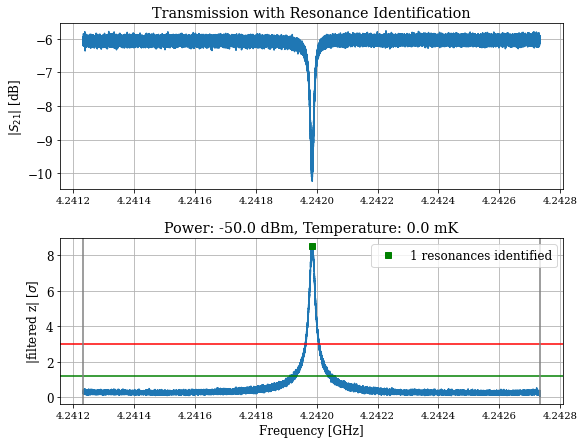

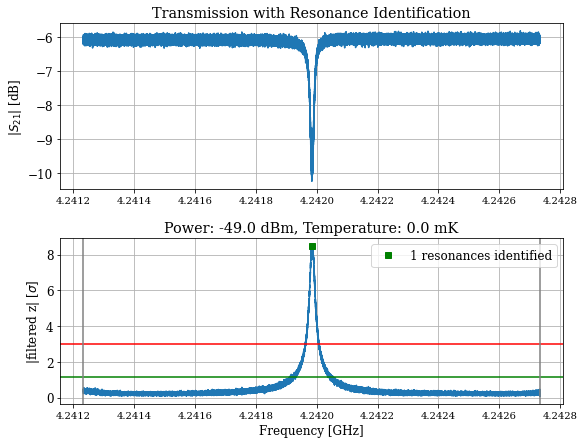

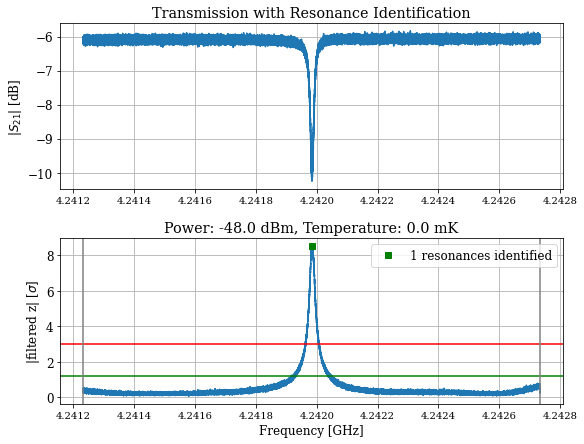

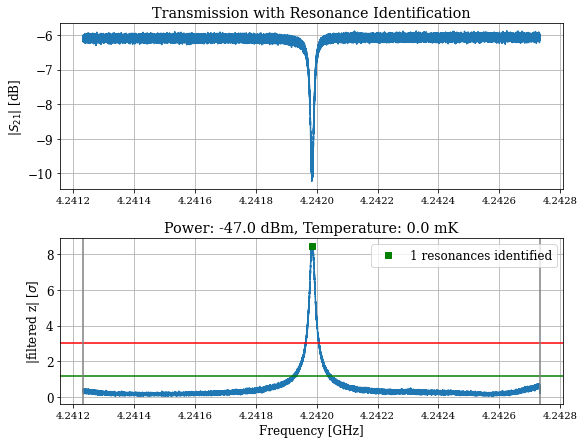

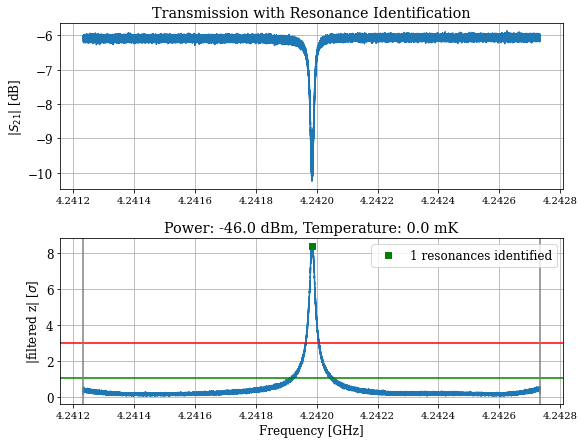

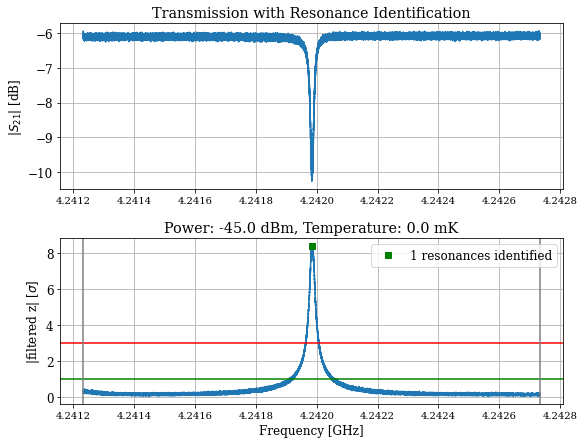

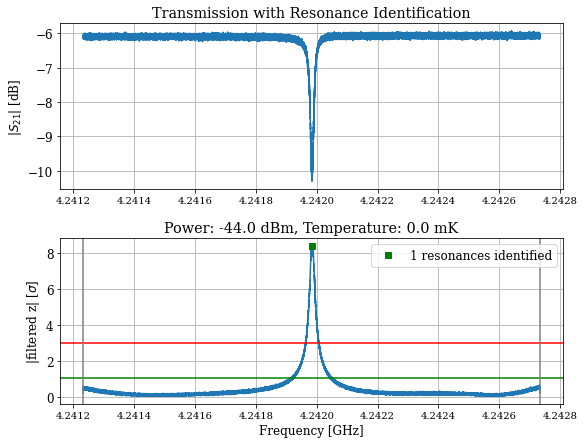

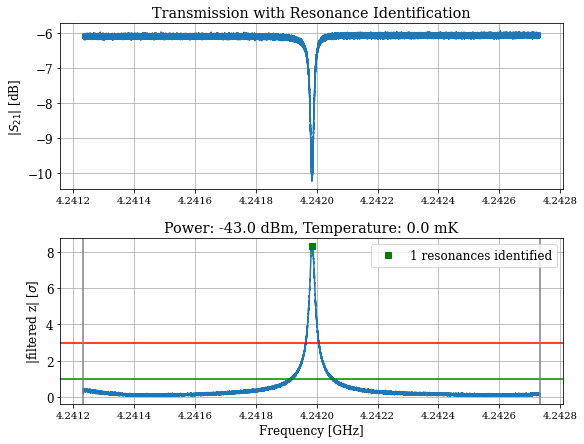

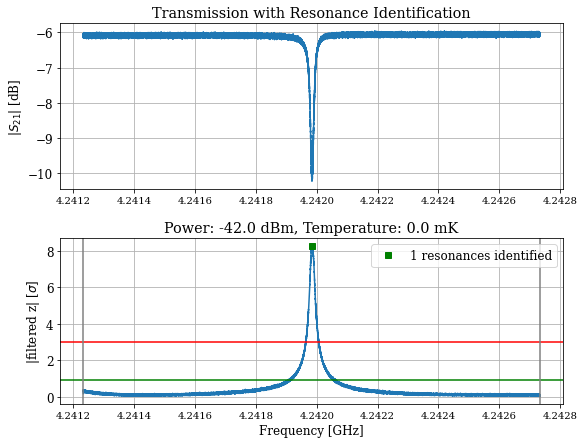

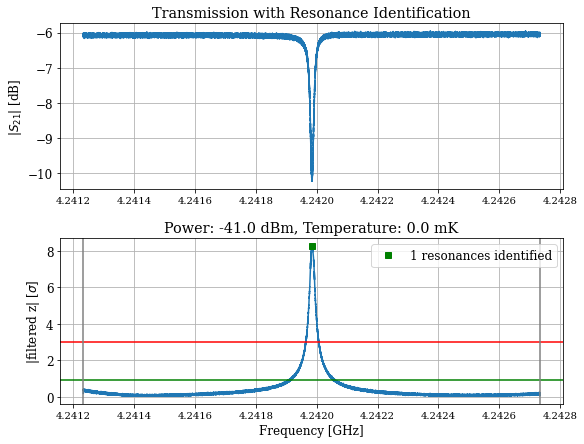

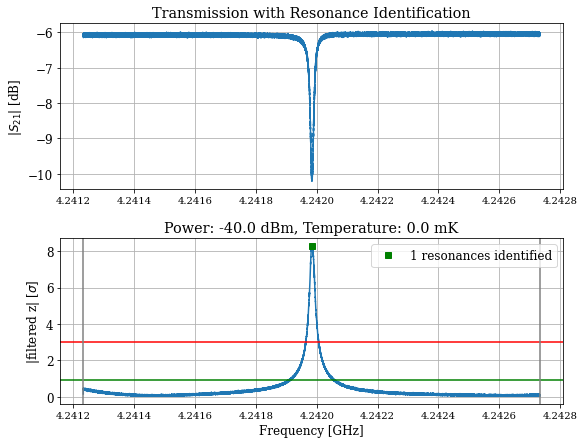

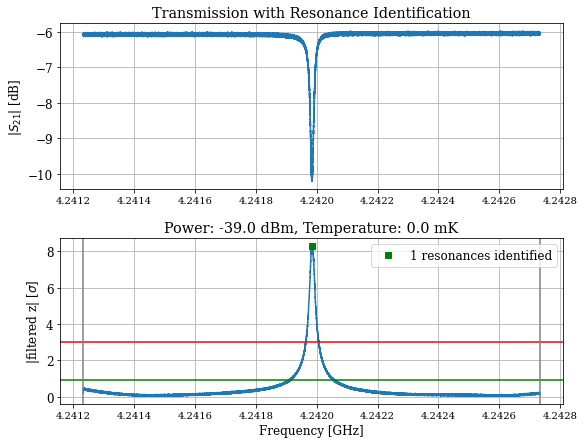

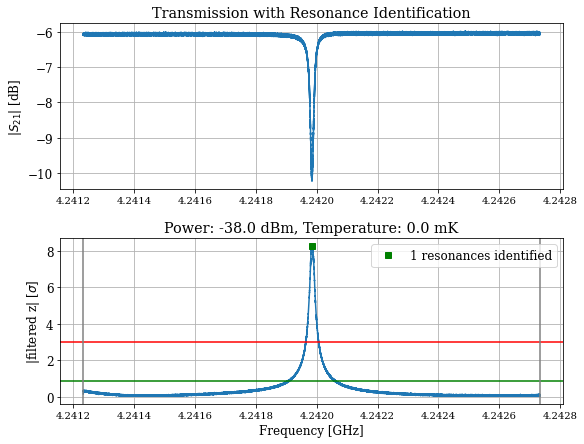

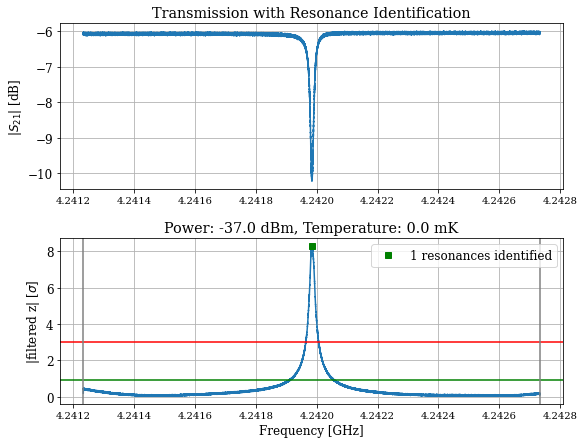

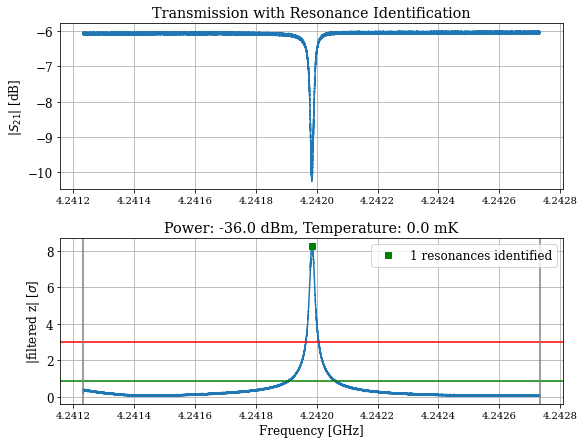

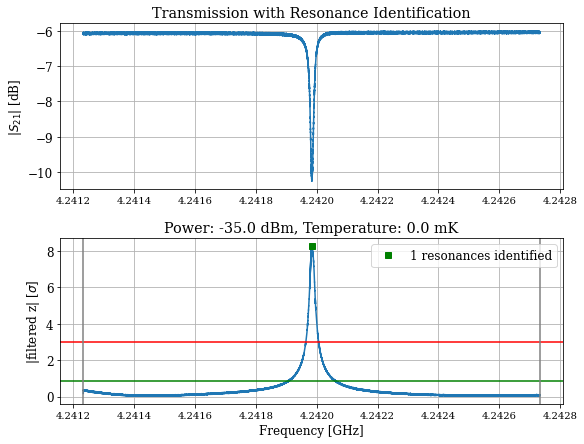

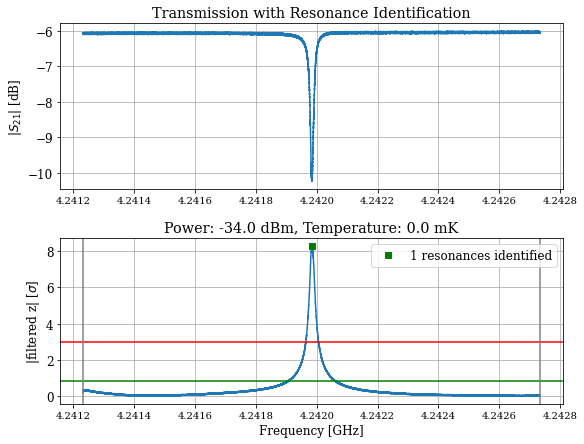

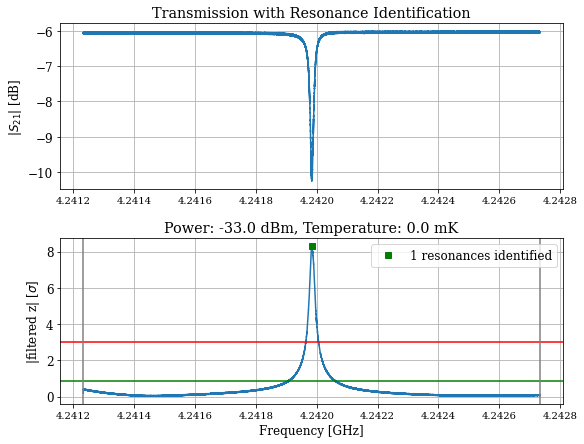

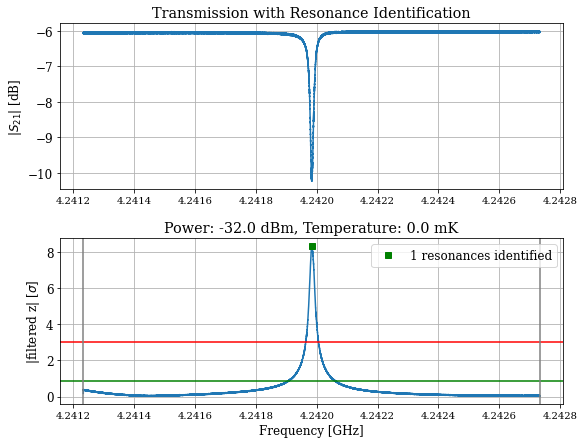

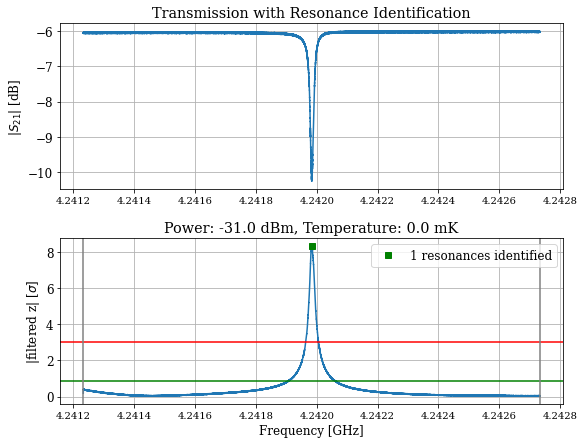

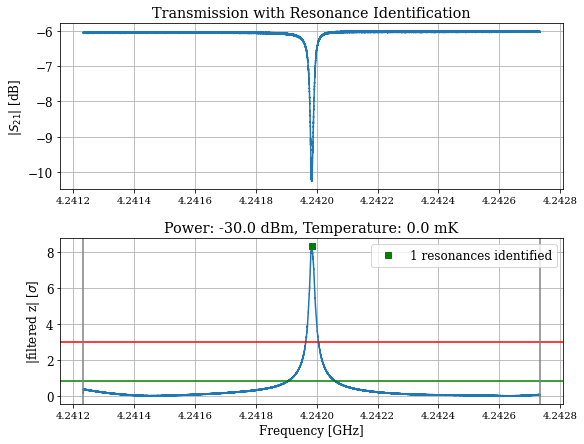

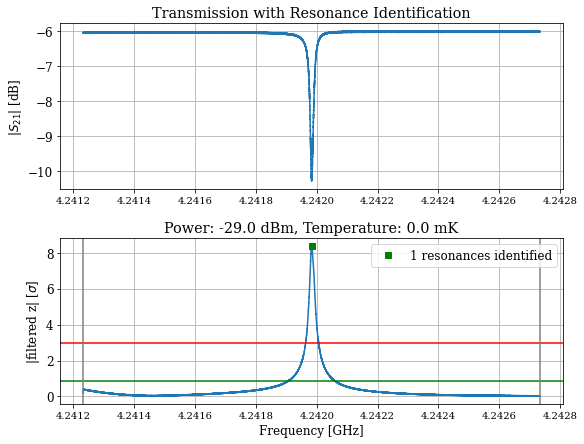

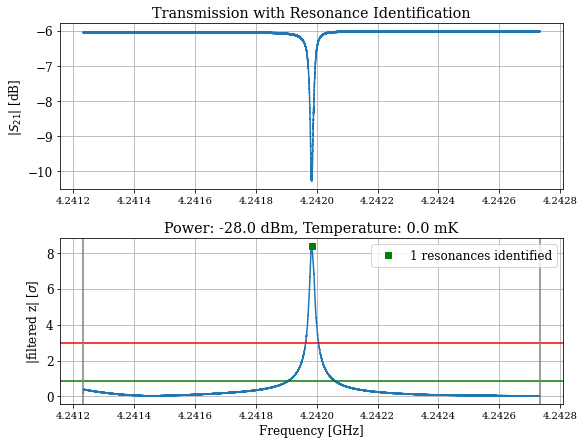

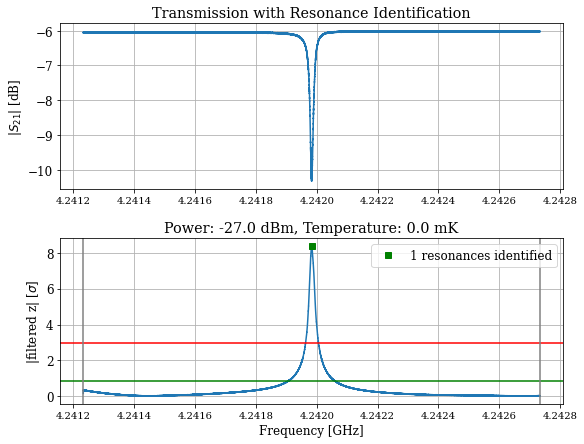

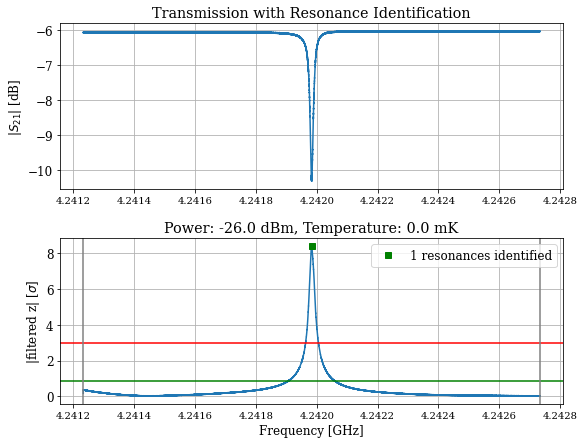

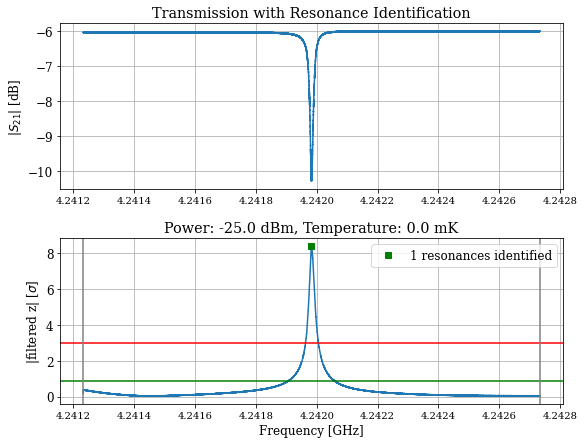

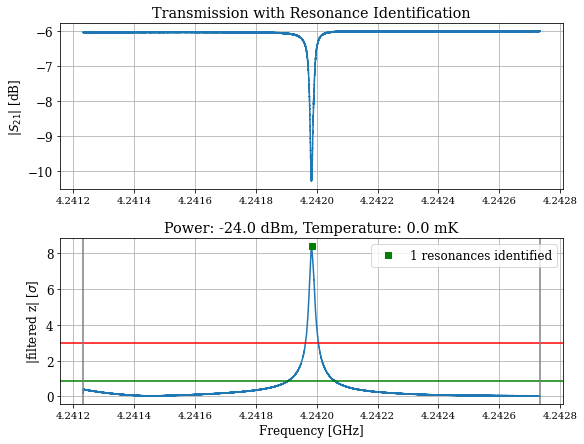

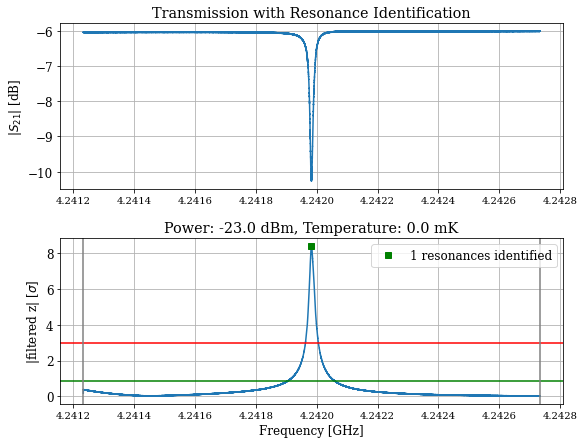

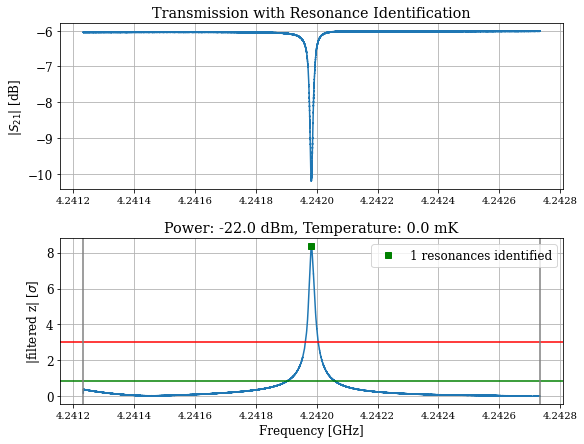

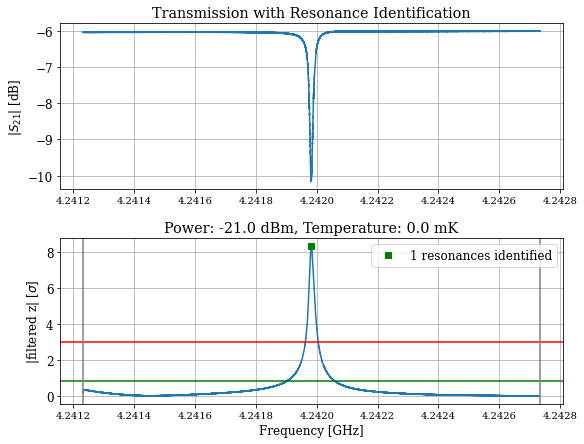

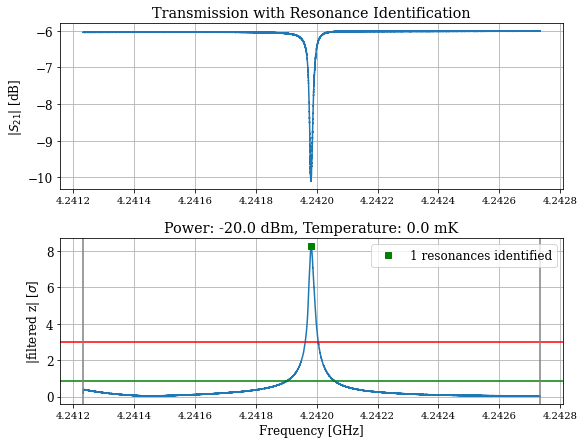

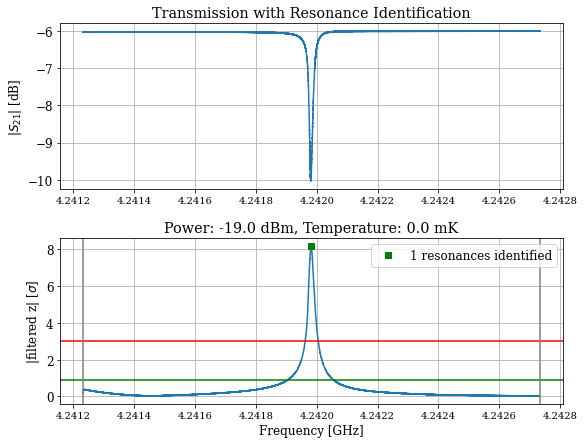

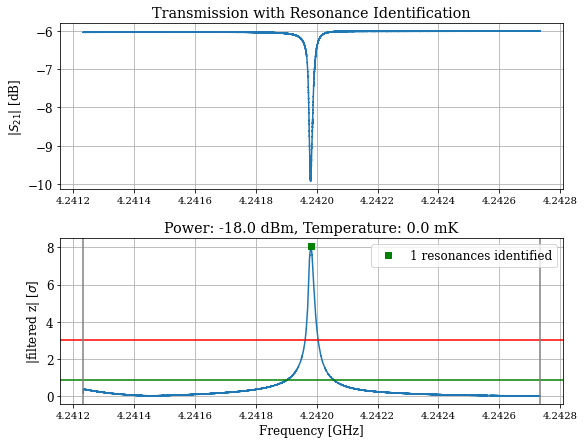

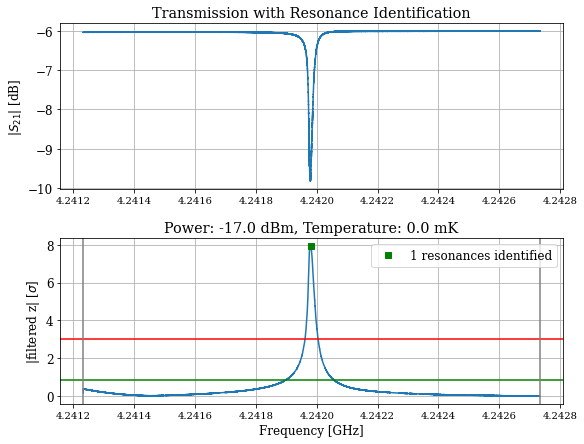

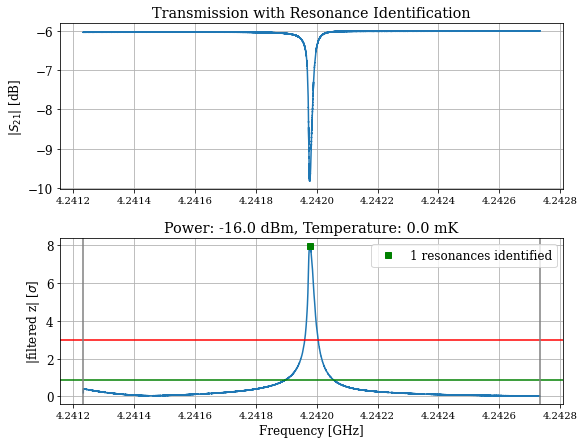

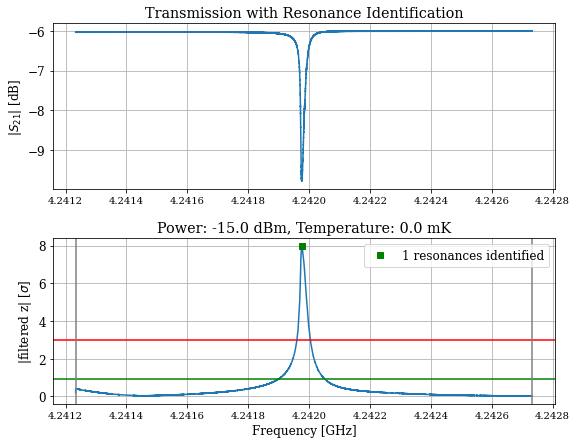

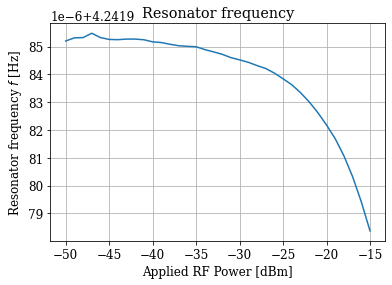

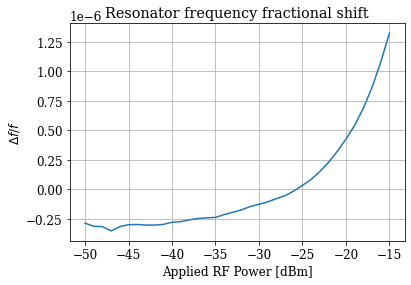

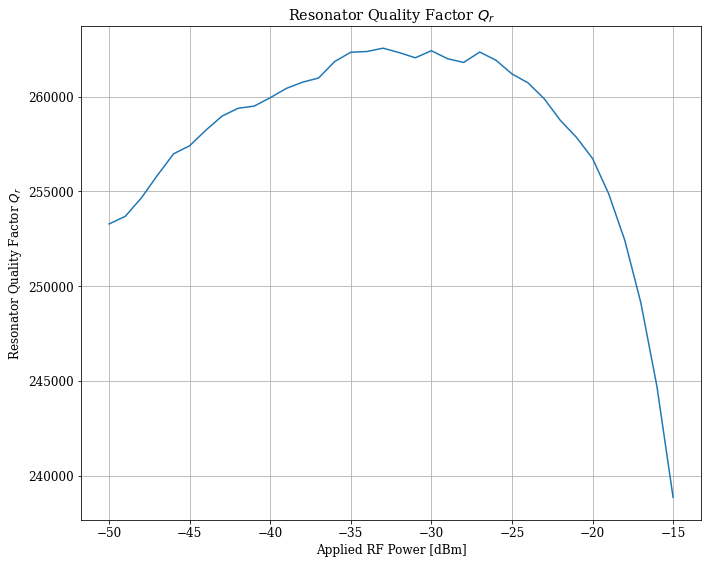

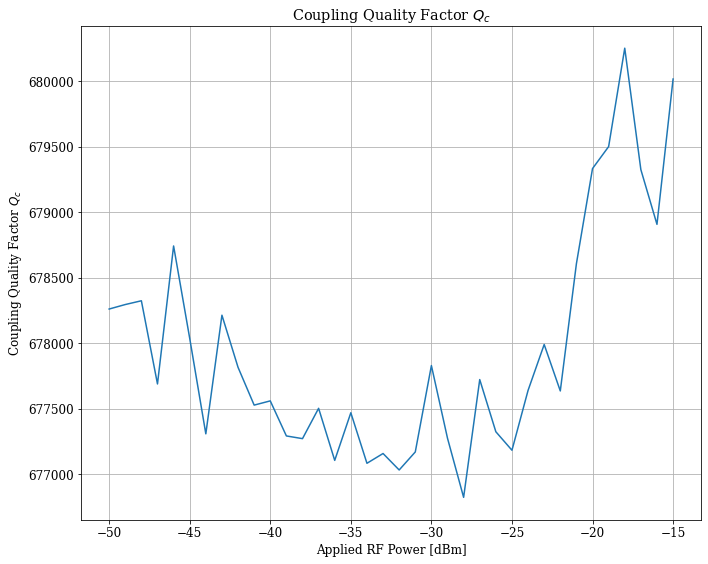

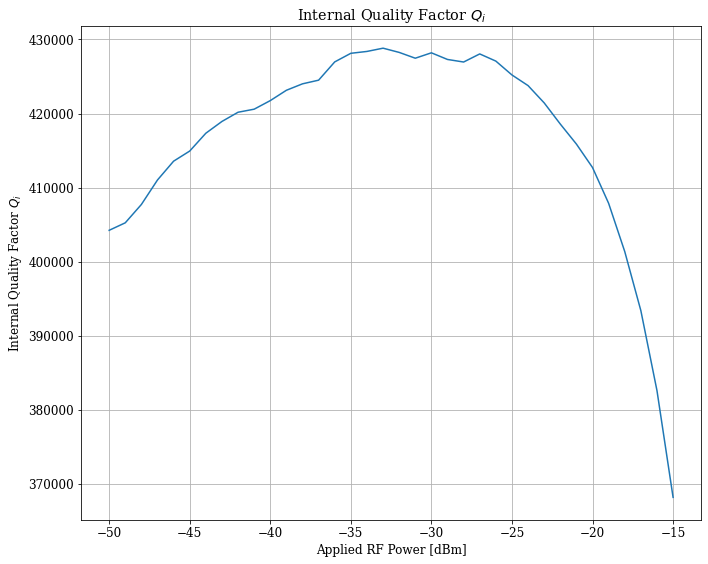

In [4]:
## Define all the lists in which we'll store fit parameters
## Make these fixed size arrays or delete completely since it seems
## to be a little redundant
fr_list = []; Qr_list = []; Qc_list = []; Qi_list = []; 
power_list = []

## Create somewhere for the output
create_dirs()

## Get all the files for a specified series
vna_files = get_input_files(series)

## Create a class instance containing the fit results for this series
result = fitres.SeriesFitResult(day,series)
result.resize_file_fits(len(vna_files))

for i in np.arange(len(vna_files)):
    ## Fit this data file
    pwr, fr, Qr, Qc, Qi, res = fit_single_file(vna_files[i],show_plots=show_plots)
    result.file_fits[i] = res 
    result.powers[i] = pwr
    result.fit_fr[i] = fr
    result.fit_Qr[i] = Qr
    result.fit_Qi[i] = Qi
    result.fit_Qc[i] = Qc

    ## Store the fit results
    fr_list.append(fr); Qr_list.append(Qr)
    Qc_list.append(Qc); Qi_list.append(Qi)
    power_list.append(pwr)

## Store the fit results
if save_plots:
    result.save_to_file(out_path)

fig = plt.figure()
plt.plot(power_list,fr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator frequency $f$ [Hz]')
plt.title(r'Resonator frequency')
if save_plots:
    fig.savefig(os.path.join(out_path,"f_vs_P.png"), format='png')

fig = plt.figure()
plt.plot(power_list,(np.mean(fr_list)-fr_list)/fr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'$\Delta f/f$')
plt.title(r'Resonator frequency fractional shift')
if save_plots:
    fig.savefig(os.path.join(out_path,"df_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qr_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Resonator Quality Factor $Q_r$')
plt.title(r'Resonator Quality Factor $Q_r$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qr_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qc_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Coupling Quality Factor $Q_c$')
plt.title(r'Coupling Quality Factor $Q_c$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qc_vs_P.png"), format='png')

fig = plt.figure(figsize=(10,8))
plt.plot(power_list,Qi_list)
plt.xlabel('Applied RF Power [dBm]')
plt.ylabel(r'Internal Quality Factor $Q_i$')
plt.title(r'Internal Quality Factor $Q_i$')
plt.tight_layout()
if save_plots:
    fig.savefig(os.path.join(out_path,"Qi_vs_P.png"), format='png')